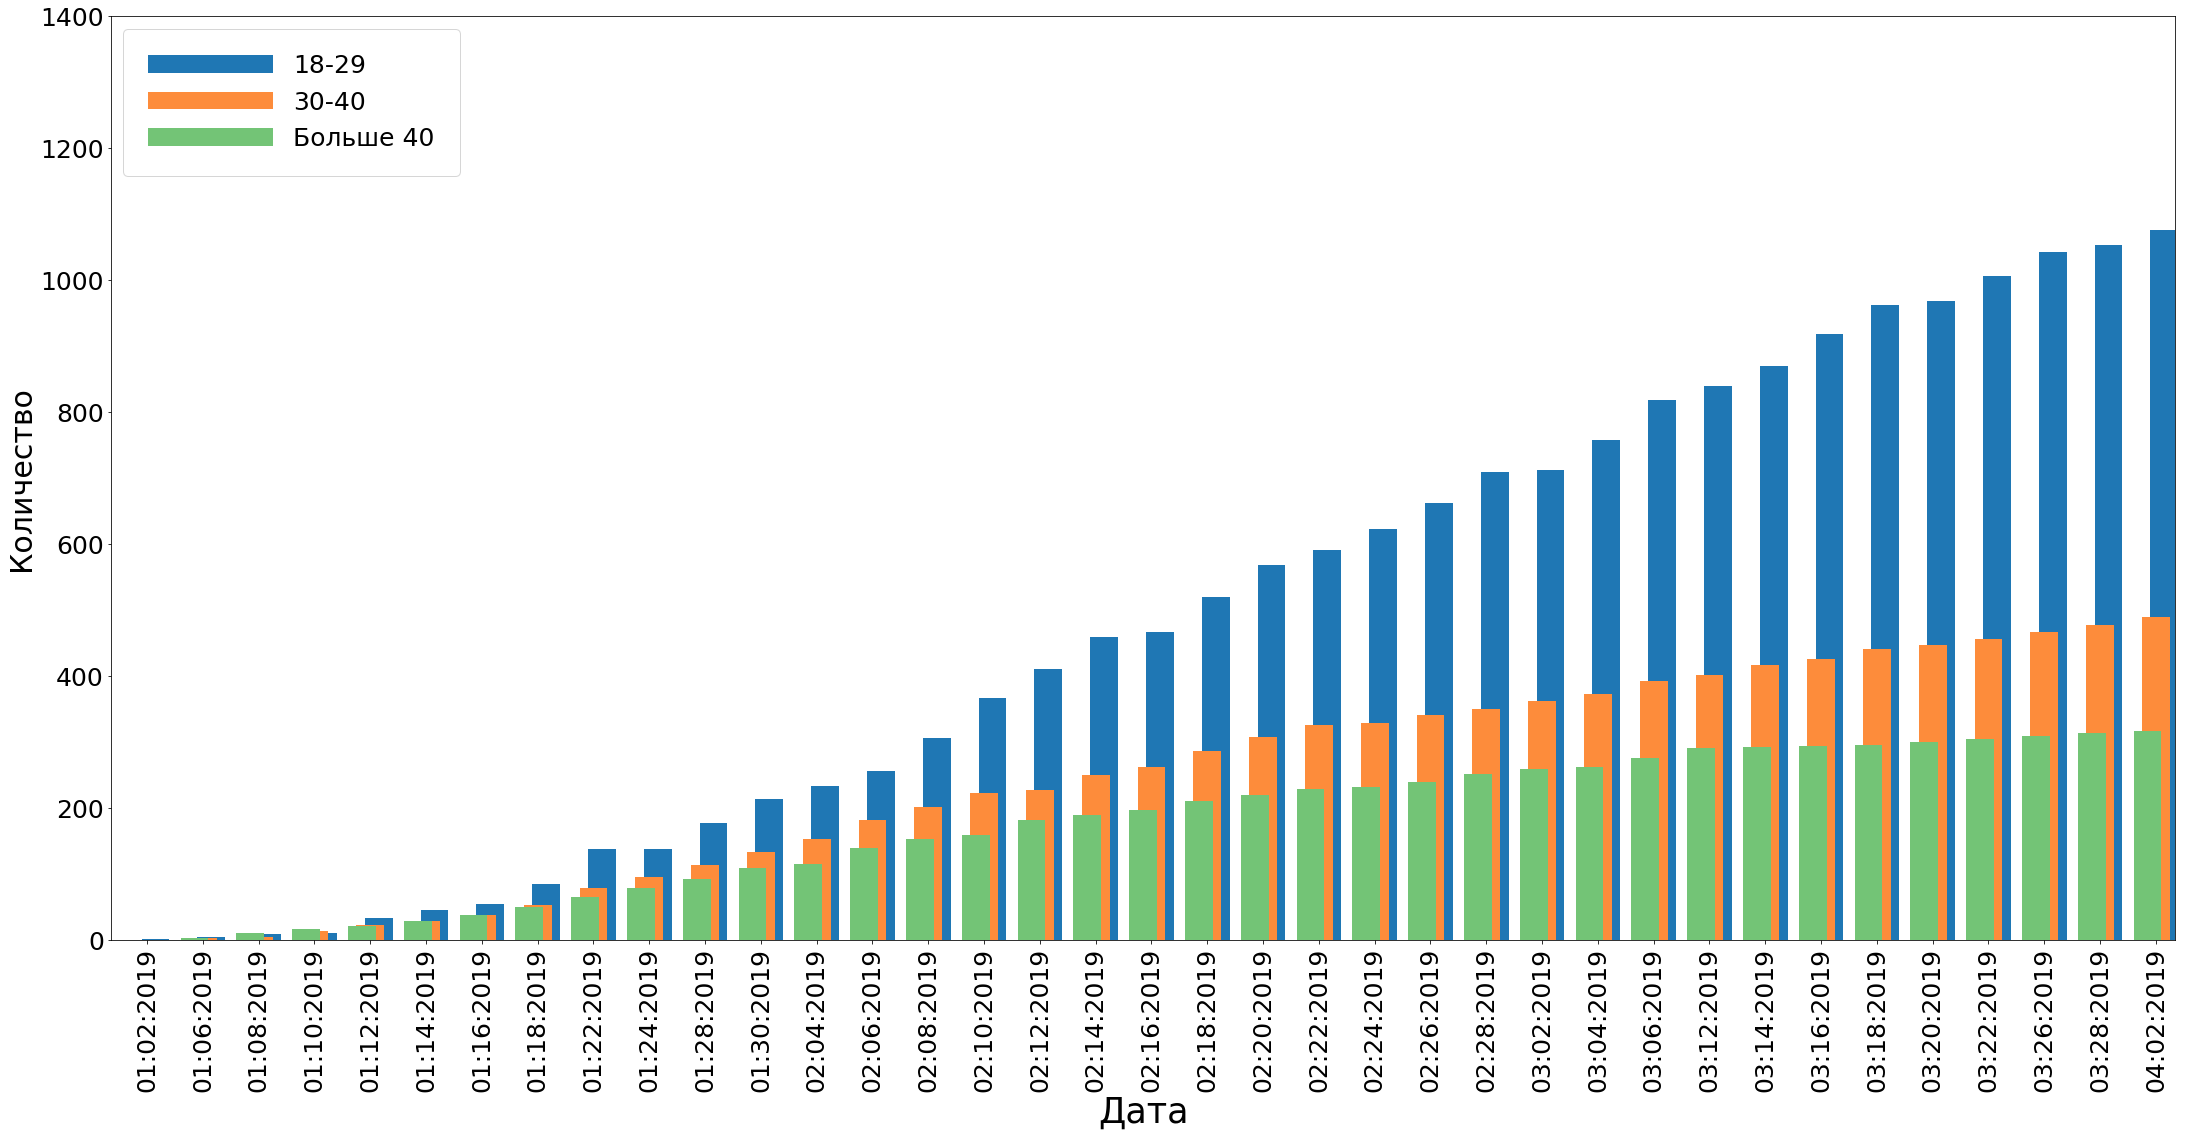

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd

orange = plt.cm.Oranges(0.5)
green = plt.cm.Greens(0.5)

df = pd.read_csv('purchase_table.csv',sep=',', na_values='NaN')

df=df.drop_duplicates(subset='client_id')
df['Возраст']=df['birth_dt'].apply(lambda x: 2019-int(x[-4:]))
df['reg_year']=df['reg_dttm'].apply(lambda x: int(x[5:9]))
df['reg_month']=df['reg_dttm'].apply(lambda x: '01' if x[2:5]=='янв' else('02' if x[2:5]=='фев'  else('03' if x[2:5]=='мар' else '04')) )
df['reg_day']=df['reg_dttm'].apply(lambda x: x[0:2]) 
df['Дата']=df['reg_month']+':'+df['reg_day']+':'+'2019'

df1=df[df.Возраст<30].groupby('Дата').count()[['client_id']]
df2=df[(df.Возраст>29)&(df.Возраст<41)].groupby('Дата').count()[['client_id']]
df3=df[df.Возраст>40].groupby('Дата').count()[['client_id']]

df3['sum']=76*[0]
df3['sum'][0]=df3['client_id'][0]
for i in range(1,76):
    df3['sum'][i]=df3['client_id'][i]+ df3['sum'][i-1]
    
df2['sum']=77*[0]
df2['sum'][0]=df2['client_id'][0]
for i in range(1,77):
    df2['sum'][i]=df2['client_id'][i]+ df2['sum'][i-1] 

df1['sum']=87*[0]
df1['sum'][0]=df1['client_id'][0]
for i in range(1,87):
    df1['sum'][i]=df1['client_id'][i]+ df1['sum'][i-1]

df3['data']=df3.index
df3=df3[df3['data'].apply(lambda x: int(x[3:5]))%2==0]  

df2['data']=df2.index
df2=df2[df2['data'].apply(lambda x: int(x[3:5]))%2==0]

df1['data']=df1.index
df1=df1[df1['data'].apply(lambda x: int(x[3:5]))%2==0]  

fig, ax = plt.subplots(figsize=(32, 12))


ax.set_xlabel(' ',fontsize=35)
ax.set_ylabel('Количество',fontsize=30)
ax.tick_params( axis='y',labelsize=25)
ax.tick_params( axis='x',labelsize=25)
df1['sum'].plot(kind='bar',figsize=(37, 17), ax=ax,position=0.2).set_ylim(0,1400);
df2['sum'].plot(kind='bar',ax=ax, color=orange,position=0.5);
df3['sum'].plot(kind='bar',ax=ax, color=green,position=0.8);
ax.legend(["18-29", "30-40",'Больше 40'],loc=2, handlelength=5,borderpad=1,prop={'size':25});
